In [1]:
import tensorflow as tf

In [14]:
a=tf.constant(3)  #constant : 노드
b=tf.constant(4)
c=tf.subtract(a,b)  
d=tf.pow(c,2)
e=tf.divide(d,a)  # 곱 : multiply, 합 : add, 차 : subtract, 할 : divide

with tf.Session() as sess:
    fetches=[a,b,c,d,e]   #a,b,c,d,e를 위해 필요한 연산을 메모리에 올
    outs=sess.run(fetches)  #a~e까지의 값을 가져와서 outs에 넣음
    print("outs = {}".format(outs))  #outs의 값 출력

#sess=tf.Session()
#output=sess.run(e)
#sess.close()


outs = [3, 4, -1, 1, 0.3333333333333333]


In [15]:
a=tf.constant([[1,2,3],[4,5,6]])
print(a.get_shape())  # 2 x 3 metrix만들기

(2, 3)


In [71]:
x=tf.constant([1,0,1])
print(x.get_shape())  #1차원배열이지만, 1은 생략됨
#b=tf.matmul(a,x)  # (2x3) 행렬곱 (3x) 이므로 오류가 발생

(3,)


(3, 1)
matmul : 
 [[ 4]
 [10]]



numpy와 tensorflow비교 (newaxis vs expand_dims())

In [79]:
import numpy as np
m1=np.array([1,0,1])
print(m1.shape)  #m1의 차원값을 출력

m1=m1[:,np.newaxis]  #1차원의 열을 어거지로 생성
b=tf.matmul(a,m1)  #행렬곱 시행
print("matmul : {}".format(b.eval()))  #행렬곱한 행렬요소값을 리턴

(3,)
matmul : [[ 4]
 [10]]


tf.Session() vs InteractiveSession()
1) tf.Session() : 항상 with절과 함께 사용(default 세션을 지정해주지 않기 때문) -> .eval()함수사용 불가 (with문이 없을 때)
    
2) InteractiveSession() : 자동으로 터미널에 default session을 할당 -> .eval()함수 사용가능

3) sess=tf.InteractiveSession()
   seses.run() : 세션 실행문
   
4) sess.close() : 세션 종료문

In [87]:
x=tf.expand_dims(x,1)  #x에 3x1로 dimension을 확장
print(x.get_shape()) 
b=tf.matmul(a,x)    #
sess=tf.InteractiveSession()  
print('matmul : \n {}\n'.format(b.eval()))

(3, 1)
matmul : 
 [[ 4]
 [10]]



C:\Users\user\venv\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [103]:
val=tf.random_normal((1,5),0,1)  #1행 5열로 값을 랜덤하게 가져옴.(평균 : 0, 표준편차 : 1로)
var=tf.Variable(val, name='var')
print('pre run : \n{}\n'.format(var))

init=tf.global_variables_initializer()  #초기화 값 

with tf.Session() as sess:
    sess.run(init)
    post_var=sess.run(var)
    
print('\npost_var : \n{}'.format(post_var))


pre run : 
<tf.Variable 'var_19:0' shape=(1, 5) dtype=float32_ref>


post_var : 
[[-2.6804054   0.8892643   1.6956359  -0.66288364  0.3425908 ]]
<tf.Variable 'var_19:0' shape=(1, 5) dtype=float32_ref>


딥러닝에서 데이터에 대한 학습이 이루어질 때 학습할 데이터들을 입력해줘야 한다. 예를 들어, 2장에서 잠깐 살펴보았던, MNIST 데이터를 학습한다고 할때 입력값으로 MNIST 이미지 데이터를 입력값으로 넣어 줘야 했다. 텐서플로에서는 입력값을 넣어주기 위해 플레이스홀더(placeholder)라는 것이 있다. 플레이스홀더는 데이터를 입력받는 비어있는 변수라고 생각할 수 있다. 먼저 그래프를 구성하고, 그 그래프가 실행되는 시점에 입력 데이터를 넣어주는 데 사용한다.

플레이스홀더는 shape 인수를 유동적으로 지정할 수 있다. 예를 들어, None으로 지정되면 이 플레이스홀더는 모든 크기의 데이터를 받을 수 있다. 주로 배치단위(batch size)의 샘플 데이터 개수에 해당 되는 부분(데이터의 행)은 None을 사용하고, 데이터 Feature의 길이(데이터의 열)는 고정된 값을 사용한다. 

ph = tf.placeholder(tf.float32, shape=(None, 10))
플레이스홀더를 정의하면 반드시 그래프 실행 단계에서 입력값을 넣어줘야 하며, 그렇지 않을 경우 에러가 나타난다. 입력 데이터는 딕셔너리(dictionary)형태로 session.run()메소드를 통해 전달된다. 딕셔너리의 키(key)는 플레이스홀더 변수 이름에 해당하며 값(value)은 list 또는 NumPy 배열이다.

sess.run(s, feed_dict={ph: data})

https://excelsior-cjh.tistory.com/151

In [121]:
x_data = np.random.randn(5, 10)
w_data = np.random.randn(10, 1)

with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=(5,10))  # 5 x 10 행렬
    w=tf.placeholder(tf.float32, shape=(10,1))  # 10 x 1 행렬
    b=tf.fill((5,1),-1.)  # 5 x 1 행렬을 만들고, -1로 채워라
    xw=tf.matmul(x,w)
    
    xwb=xw+b
    with tf.Session() as sess:
        outs=sess.run([xwb,x,w,s],feed_dict={x : x_data,w : w_data})
        
    
print("xwb={}\nx={}\ny={}\ns=\n{}\n".format(outs[0],outs[1],outs[2],outs[3]))
    

xwb=[[ 3.966744  ]
 [-0.12428355]
 [-0.7186617 ]
 [-0.01700443]
 [-0.6235158 ]]
x=[[ 0.28152335 -1.0873142  -0.10008131  0.9490972  -0.17908643  1.9063516
  -1.1211256   2.1829665  -0.69462043 -0.5508108 ]
 [-0.7696937  -1.4199489  -0.45710313  1.0524241   0.33085787 -0.8002776
   0.8853537   0.06422591  1.1357985  -0.18612957]
 [ 0.79037726 -0.0365244  -0.57014227 -0.6687889  -0.87560284  0.5462008
  -0.33357745  0.33013386  0.09076046 -0.7838045 ]
 [-1.2250643   0.47747952  0.36636657  1.1028085   0.44931766 -0.98258036
  -1.2166041   1.0916824  -1.7302413  -0.31013316]
 [ 2.1144855  -0.7097177   0.24388897 -1.346157    2.1827571   1.302949
  -0.86375755  1.1857052  -1.5114818   0.3294574 ]]
y=[[-1.2681309 ]
 [-0.4167219 ]
 [-0.06693975]
 [ 0.20285742]
 [ 0.578951  ]
 [ 1.3877394 ]
 [-1.6439235 ]
 [ 0.39964703]
 [ 1.1751881 ]
 [-0.41833964]]
s=
3.9667439460754395



yMat=ws*xMat+b

In [35]:
def standRegree(xArr, yArr):  
    xMat=np.mat(xArr)  #(2 x 2)
    yMat=np.mat(yArr).T  #차원 맞추기 (2x1)
    print(xMat)
    print(yMat)
    
    
    xTx=xMat.T*xMat  #2*1
    print(xTx)
    if np.linalg.det(xTx)==0.0: #ad-bc==0이라면
        print("This matrix is singular")
        return
    
    ws=xTx.I*(xMat.T*yMat)  # (2x2)((2x2)(2x1))  -> (2x2)(2x1) -> (2x1)
    return ws

xArr=np.array([[1,1],[1,2]])  # (bias값,x값)   #(b=1),x=1 -> y=2, (b=1),x=2 -> y=3 
yArr=np.array([[2,3]])        # (y값...)

xArr=np.array([[1,2,3],[1,3,4]])
yArr=np.array([[2,3]])
print(xArr.shape,yArr.shape)
standRegree(xArr,yArr)

(2, 3) (1, 2)
[[1 2 3]
 [1 3 4]]
[[2]
 [3]]
[[ 2  5  7]
 [ 5 13 18]
 [ 7 18 25]]


matrix([[ 0.5],
        [-0.5],
        [-1.5]])

In [47]:
import numpy as np
import tensorflow as tf
#x_data = np.array([[1,1], [2,2]])
#print(dim(x_data))
#y_data = np.array([[2,3]])

xArr=np.array([[1,2,3],[1,3,4]])
yArr=np.array([[2,3]])

with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=[None,3])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0,0,0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    #b=tf.Variable(0,dtype=tf.float32, name='bias')           #bias값
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.005)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:

        
        
        
        sess.run(init)   #일상의 습관, 약속같은 문장임.
        for step in range(10000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%50==0):
                print(step,sess.run([w]))
            
    #print(step,sess.run([w,b]))
    

0 [array([[0.025, 0.065, 0.09 ]], dtype=float32)]
50 [array([[0.11737743, 0.33145082, 0.44882843]], dtype=float32)]
100 [array([[0.10898961, 0.3376941 , 0.44668385]], dtype=float32)]
150 [array([[0.10075645, 0.34381738, 0.44457403]], dtype=float32)]
200 [array([[0.09267656, 0.34982663, 0.4425035 ]], dtype=float32)]
250 [array([[0.0847471 , 0.35572404, 0.44047153]], dtype=float32)]
300 [array([[0.07696518, 0.36151174, 0.4384773 ]], dtype=float32)]
350 [array([[0.06932814, 0.3671918 , 0.4365202 ]], dtype=float32)]
400 [array([[0.06183323, 0.37276605, 0.43459952]], dtype=float32)]
450 [array([[0.05447784, 0.3782366 , 0.43271458]], dtype=float32)]
500 [array([[0.04725936, 0.38360524, 0.43086475]], dtype=float32)]
550 [array([[0.04017525, 0.3888739 , 0.4290494 ]], dtype=float32)]
600 [array([[0.03322301, 0.39404452, 0.42726782]], dtype=float32)]
650 [array([[0.02640015, 0.39911887, 0.42551944]], dtype=float32)]
700 [array([[0.0197043 , 0.40409887, 0.42380354]], dtype=float32)]
750 [array([[

6400 [array([[-0.29187793,  0.6358286 ,  0.34396115]], dtype=float32)]
6450 [array([[-0.2926496,  0.6364024,  0.3437635]], dtype=float32)]
6500 [array([[-0.29340696,  0.6369655 ,  0.3435695 ]], dtype=float32)]
6550 [array([[-0.29415017,  0.63751817,  0.34337914]], dtype=float32)]
6600 [array([[-0.2948796 ,  0.63806057,  0.3431923 ]], dtype=float32)]
6650 [array([[-0.29559538,  0.6385928 ,  0.34300894]], dtype=float32)]
6700 [array([[-0.29629785,  0.6391152 ,  0.342829  ]], dtype=float32)]
6750 [array([[-0.2969873 ,  0.63962793,  0.34265232]], dtype=float32)]
6800 [array([[-0.29766393,  0.64013094,  0.34247908]], dtype=float32)]
6850 [array([[-0.29832798,  0.64062464,  0.34230903]], dtype=float32)]
6900 [array([[-0.29897964,  0.64110917,  0.34214213]], dtype=float32)]
6950 [array([[-0.29961914,  0.64158463,  0.34197834]], dtype=float32)]
7000 [array([[-0.30024672,  0.6420513 ,  0.34181762]], dtype=float32)]
7050 [array([[-0.30086267,  0.6425092 ,  0.34165987]], dtype=float32)]
7100 [arr

In [13]:
import numpy as np
import tensorflow as tf
#x_data = np.array([[1,1], [2,2]])
#print(dim(x_data))
#y_data = np.array([[2,3]])

xArr=np.array([[2,3],[3,4]])
yArr=np.array([[2,3]])


with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=[None,2])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0,0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    b=tf.Variable(0,dtype=tf.float32, name='bias')           #bias값(구해야 되는 값)
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.005)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(10000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%50==0):
                #print(step,sess.run([w,b]))
            
    #print(step,sess.run([w,b]))
    

SyntaxError: unexpected EOF while parsing (<ipython-input-13-4f64171da795>, line 33)

In [123]:
import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.DataFrame(np.loadtxt('ex1.txt', dtype='float'))
xArr = df[[0,1]].values
yArr = df[[2]].values

with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=[None,2])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0,0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    b=tf.Variable(1,dtype=tf.float32, name='bias')           #bias값(구해야 되는 값)
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(1000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%50==0):
                print(step,sess.run([w]))
            
    #print(step,sess.run([w,b]))

0 [array([[0.38250476, 0.18734524]], dtype=float32)]
50 [array([[3.2287223, 1.13213  ]], dtype=float32)]
100 [array([[3.394249 , 0.8234837]], dtype=float32)]
150 [array([[3.5121586, 0.5981025]], dtype=float32)]
200 [array([[3.5977948, 0.4344055]], dtype=float32)]
250 [array([[3.6599927 , 0.31551114]], dtype=float32)]
300 [array([[3.7051675 , 0.22915773]], dtype=float32)]
350 [array([[3.7379782 , 0.16643816]], dtype=float32)]
400 [array([[3.7618086 , 0.12088532]], dtype=float32)]
450 [array([[3.7791169 , 0.08779977]], dtype=float32)]
500 [array([[3.7916882 , 0.06376942]], dtype=float32)]
550 [array([[3.8008184 , 0.04631631]], dtype=float32)]
600 [array([[3.8074503 , 0.03363976]], dtype=float32)]
650 [array([[3.8122666, 0.0244326]], dtype=float32)]
700 [array([[3.8157651 , 0.01774527]], dtype=float32)]
750 [array([[3.8183057 , 0.01288856]], dtype=float32)]
800 [array([[3.8201516 , 0.00936063]], dtype=float32)]
850 [array([[3.8214917 , 0.00679868]], dtype=float32)]
900 [array([[3.8224652 

In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf

# load data
df = pd.DataFrame(np.loadtxt('ex1.txt', dtype='float'))

# split data
x_data = df[[0,1]].values
y_data = df[[2]].values

# define graph
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=[None,2])
    y = tf.placeholder(tf.float32, shape=None)
    
    w = tf.Variable([[0,0]], dtype=tf.float32, name='weight')
    
    y_hat = tf.matmul(w, tf.transpose(x))
    
    loss = tf.reduce_mean(tf.square(y-y_hat))
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train  = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(100000):
            sess.run(train, feed_dict={x:x_data, y:y_data})
            if (step % 5000 == 0):
                print(step, sess.run([w]))
        print(step, sess.run([w]))

0 [array([[0.07650094, 0.03746904]], dtype=float32)]
5000 [array([[3.8236527e+00, 2.6670189e-03]], dtype=float32)]
10000 [array([[3.8250241e+00, 3.7248963e-05]], dtype=float32)]
15000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
20000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
25000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
30000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
35000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
40000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
45000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
50000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
55000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
60000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]
65000 [array([[3.8250246e+00, 3.6176574e-05]], dtype=float32)]


KeyboardInterrupt: 

In [119]:
import numpy as np
import pandas as pd
import tensorflow as tf

# load data
df = pd.DataFrame(np.loadtxt('ex1.txt', dtype='float'))

# split data
x_data = df[[0,1]].values
y_data = df[[2]].values
x_data

array([[1.      , 0.635975],
       [1.      , 0.552438],
       [1.      , 0.855922],
       [1.      , 0.083386],
       [1.      , 0.975802],
       [1.      , 0.181269],
       [1.      , 0.129156],
       [1.      , 0.605648],
       [1.      , 0.301625],
       [1.      , 0.698805],
       [1.      , 0.226419],
       [1.      , 0.51929 ],
       [1.      , 0.354424],
       [1.      , 0.11838 ],
       [1.      , 0.512811],
       [1.      , 0.236795],
       [1.      , 0.353509],
       [1.      , 0.481447],
       [1.      , 0.060509],
       [1.      , 0.17409 ],
       [1.      , 0.806818],
       [1.      , 0.531462],
       [1.      , 0.853167],
       [1.      , 0.304804],
       [1.      , 0.612021],
       [1.      , 0.62088 ],
       [1.      , 0.580245],
       [1.      , 0.742443],
       [1.      , 0.11077 ],
       [1.      , 0.742687],
       [1.      , 0.57439 ],
       [1.      , 0.986378],
       [1.      , 0.294867],
       [1.      , 0.472125],
       [1.    

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf

a=np.genfromtxt('ex1.txt', encoding='ascii')
xArr = df[[0,1]].values
yArr = df[[2]].values

with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=[None,2])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0,0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    b=tf.Variable(1,dtype=tf.float32, name='bias')           #bias값(구해야 되는 값)
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(1000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%50==0):
                print(step,sess.run([w]))
            
    #print(step,sess.run([w,b]))

NameError: name 'df' is not defined

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf

xArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(0,1))
yArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(2))

with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=[None,2])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0,0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    #b=tf.Variable(1,dtype=tf.float32, name='bias')           #bias값(구해야 되는 값)
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(1000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%50==0):
                print(step,sess.run([w]))
            
    #print(step,sess.run([w,b]))


0 [array([[0.38250482, 0.20070985]], dtype=float32)]
50 [array([[3.0327291, 1.613054 ]], dtype=float32)]
100 [array([[3.028234 , 1.6295248]], dtype=float32)]
150 [array([[3.0226228, 1.6402599]], dtype=float32)]
200 [array([[3.0185444, 1.6480554]], dtype=float32)]
250 [array([[3.0155828, 1.6537174]], dtype=float32)]
300 [array([[3.013431 , 1.6578296]], dtype=float32)]
350 [array([[3.0118687, 1.6608171]], dtype=float32)]
400 [array([[3.0107336, 1.6629865]], dtype=float32)]
450 [array([[3.0099094, 1.664562 ]], dtype=float32)]
500 [array([[3.009311 , 1.6657062]], dtype=float32)]
550 [array([[3.0088763, 1.6665372]], dtype=float32)]
600 [array([[3.0085604, 1.6671406]], dtype=float32)]
650 [array([[3.0083315, 1.6675788]], dtype=float32)]
700 [array([[3.0081651, 1.6678969]], dtype=float32)]
750 [array([[3.008044, 1.668128]], dtype=float32)]
800 [array([[3.0079565, 1.668296 ]], dtype=float32)]
850 [array([[3.0078924, 1.6684177]], dtype=float32)]
900 [array([[3.0078466, 1.6685061]], dtype=float3

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf

xArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(0,1))
yArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(2))
xArr
yArr

(200, 2)


In [1]:

import numpy as np
import tensorflow as tf

xArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(0,1))
yArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(2))

with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=[None,2])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0,0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    #b=tf.Variable(1,dtype=tf.float32, name='bias')           #bias값(구해야 되는 값)
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(1000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%50==0):
                print(step,sess.run([w]))
            
    #print(step,sess.run([w,b]))


0 [array([[0.38250482, 0.20070985]], dtype=float32)]
50 [array([[3.0327291, 1.613054 ]], dtype=float32)]
100 [array([[3.028234 , 1.6295248]], dtype=float32)]
150 [array([[3.0226228, 1.6402599]], dtype=float32)]
200 [array([[3.0185444, 1.6480554]], dtype=float32)]
250 [array([[3.0155828, 1.6537174]], dtype=float32)]
300 [array([[3.013431 , 1.6578296]], dtype=float32)]
350 [array([[3.0118687, 1.6608171]], dtype=float32)]
400 [array([[3.0107336, 1.6629865]], dtype=float32)]
450 [array([[3.0099094, 1.664562 ]], dtype=float32)]
500 [array([[3.009311 , 1.6657062]], dtype=float32)]
550 [array([[3.0088763, 1.6665372]], dtype=float32)]
600 [array([[3.0085604, 1.6671406]], dtype=float32)]
650 [array([[3.0083315, 1.6675788]], dtype=float32)]
700 [array([[3.0081651, 1.6678969]], dtype=float32)]
750 [array([[3.008044, 1.668128]], dtype=float32)]
800 [array([[3.0079565, 1.668296 ]], dtype=float32)]
850 [array([[3.0078924, 1.6684177]], dtype=float32)]
900 [array([[3.0078466, 1.6685061]], dtype=float3

In [16]:
import numpy as np
import tensorflow as tf

xArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(1))
xArr=xArr[:,np.newaxis]  #차원추가
yArr=np.genfromtxt('ex1.txt', encoding='ascii', usecols=(2))

with tf.Graph().as_default():  #그래프 실행
    x=tf.placeholder(tf.float32, shape=[None,1])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    b=tf.Variable(0,dtype=tf.float32, name='bias')           #bias값(구해야 되는 값)
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(1000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%50==0):
                print(step,sess.run([w]))
            
    #print(step,sess.run([w,b]))


0 [0.3825048, array([[0.20070985]], dtype=float32)]
50 [3.0327291, array([[1.613054]], dtype=float32)]
100 [3.028234, array([[1.6295248]], dtype=float32)]
150 [3.0226228, array([[1.6402599]], dtype=float32)]
200 [3.0185444, array([[1.6480554]], dtype=float32)]
250 [3.0155828, array([[1.6537174]], dtype=float32)]
300 [3.013431, array([[1.6578296]], dtype=float32)]
350 [3.0118687, array([[1.6608171]], dtype=float32)]
400 [3.0107336, array([[1.6629865]], dtype=float32)]
450 [3.0099094, array([[1.664562]], dtype=float32)]
500 [3.009311, array([[1.6657062]], dtype=float32)]
550 [3.0088763, array([[1.6665372]], dtype=float32)]
600 [3.0085604, array([[1.6671406]], dtype=float32)]
650 [3.0083315, array([[1.6675788]], dtype=float32)]
700 [3.0081651, array([[1.6678969]], dtype=float32)]
750 [3.008044, array([[1.668128]], dtype=float32)]
800 [3.0079565, array([[1.668296]], dtype=float32)]
850 [3.0078924, array([[1.6684177]], dtype=float32)]
900 [3.0078466, array([[1.6685061]], dtype=float32)]
950

data-01-test-score.csv파일의 선형회귀분석 하기

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf


dataset=pd.read_csv('data-01-test-score.csv')
yArr=dataset.iloc[:,3]
#yArr=yArr[:,np.newaxis]
xArr=dataset.iloc[:,[0,1,2]]

with tf.Graph().as_default():  #그래프 실행
    tf.set_random_seed(777)
    x=tf.placeholder(tf.float32, shape=[None,3])  # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=None)      # 종속변수   
    w=tf.Variable([[0,0,0]],dtype=tf.float32, name='weight')  #가중치(구해야되는 값)
    b=tf.Variable(0,dtype=tf.float32, name='bias')           #bias값(구해야 되는 값)
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(w,tf.transpose(x))+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00005)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때)  #이때, train의 형태는무엇?
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(100000):   #100번 반복
            sess.run(train, feed_dict={x:xArr,y:yArr})  #x_data,y_data가 씨 
            if (step%5000==0):
                print(step,sess.run([w,b]))
            
    #print(step,sess.run([w,b]))

0 [array([[1.315829 , 1.3188332, 1.3553208]], dtype=float32), 0.016245835]
5000 [array([[0.3492308 , 0.54053587, 1.1245258 ]], dtype=float32), -0.029788628]
10000 [array([[0.34875056, 0.54090136, 1.1251323 ]], dtype=float32), -0.07112182]
15000 [array([[0.34877452, 0.5409823 , 1.1255217 ]], dtype=float32), -0.112050466]
20000 [array([[0.34879842, 0.5410608 , 1.1259075 ]], dtype=float32), -0.15257601]
25000 [array([[0.34882203, 0.5411388 , 1.1262895 ]], dtype=float32), -0.19270214]
30000 [array([[0.34884536, 0.54121643, 1.1266688 ]], dtype=float32), -0.23243277]
35000 [array([[0.34886804, 0.54129267, 1.1270425 ]], dtype=float32), -0.27177283]
40000 [array([[0.3488915, 0.5413699, 1.1274128]], dtype=float32), -0.3107251]
45000 [array([[0.3489179 , 0.54144824, 1.1277755 ]], dtype=float32), -0.34929097]
50000 [array([[0.3489411 , 0.54152185, 1.1281358 ]], dtype=float32), -0.38747954]
55000 [array([[0.34896034, 0.54159284, 1.1285025 ]], dtype=float32), -0.42528918]
60000 [array([[0.34898165,

강사님것 -> random_seed()이용해서 초기값을 어느정도 범위내에 고정시킴 + cost값(loss값) 도출

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


dataset=pd.read_csv('data-01-test-score.csv')
yArr=dataset.iloc[:,3]
yArr=yArr[:,np.newaxis]
xArr=dataset.iloc[:,[0,1,2]]

with tf.Graph().as_default():  #그래프 실행
    tf.set_random_seed(777)
    x=tf.placeholder(tf.float32, shape=[None,3])      # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=[None,1])      # 종속변수   
    w=tf.Variable(tf.random_normal([3,1]), name='weight')       #가중치(구해야되는 값)   -> 초기값 : 랜덤으로 [3 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    b=tf.Variable(tf.random_normal([1]), name='bias')           #bias값(구해야 되는 값) -> 초기값 : 랜덤으로 [1 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(x,w)+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00005)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때) 
    
    init=tf.global_variables_initializer()   # Variable형태로 저장한 변수(W,b)를 초기화
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        for step in range(100000):   #여러번 반복
            cost, hypothesis, _ = sess.run([loss,y_hat,train], feed_dict={x:xArr,y:yArr})  #xArr,yArr로 부터 loss,y_hat,traindata를 채워넣고 cost,hypothesis라는 이름으로 저장
            #sess.run([loss,y_hat,train], feed_dict={x:xArr,y:yArr})
            if (step%5000==0):
                print(step,cost,train_t,sess.run([w,b]))   # 
            
    #print(step,sess.run([w,b]))
    print('Your score will be ',sess.run(y_hat, feed_dict={x:[[60,70,110],[90,100,80]]})) #이런식으로 test_dataset을 넣어서 y값을 도출할수도 있음.
    
    

0 21199.48 [array([[ 1.9658394 ],
       [ 1.8437815 ],
       [-0.01536262]], dtype=float32), array([0.47287357], dtype=float32)]
50000 6.319288 [array([[0.3486862 ],
       [0.54069275],
       [1.1241057 ]], dtype=float32), array([0.03662538], dtype=float32)]


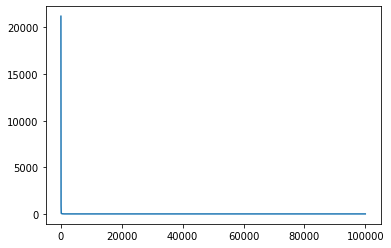

Your score will be  [[182.54562]
 [175.42012]]


In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

dataset=pd.read_csv('data-01-test-score.csv')
yArr=dataset.iloc[:,3]
yArr=yArr[:,np.newaxis]
xArr=dataset.iloc[:,[0,1,2]]

with tf.Graph().as_default():  #그래프 실행
    tf.set_random_seed(777)
    x=tf.placeholder(tf.float32, shape=[None,3])      # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=[None,1])      # 종속변수   
    w=tf.Variable(tf.random_normal([3,1]), name='weight')       #가중치 (구해야되는 값)   -> 초기값 : 랜덤으로 [3 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    b=tf.Variable(tf.random_normal([1]), name='bias')           #bias값(구해야 되는 값) -> 초기값 : 랜덤으로 [1 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(x,w)+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00005)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때) 
    
    init=tf.global_variables_initializer()   # Variable형태로 저장한 변수(W,b)를 초기화
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        cost_history=[]
        for step in range(100000):   #여러번 반복
            cost, hypothesis, _ = sess.run([loss,y_hat,train], feed_dict={x:xArr,y:yArr})  #xArr,yArr로 부터 loss,y_hat,traindata를 채워넣고 cost,hypothesis라는 이름으로 저장
            cost_history.append(cost)
            #sess.run([loss,y_hat,train], feed_dict={x:xArr,y:yArr})
            if (step%50000==0):
                print(step,cost,sess.run([w,b]))   # 
        plt.plot(cost_history)  #이뿌당
        plt.show()
#print(step,sess.run([w,b]))
        print('Your score will be ',sess.run(y_hat, feed_dict={x:[[60,70,110],[90,100,80]]})) #이런식으로 test_dataset을 넣어서 y값을 도출할수도 있음.


In [86]:
#concrete.csv
import pandas as pd
import tensorflow as tf
import numpy as np

conc=pd.read_csv('concrete.csv')

xArr=conc.iloc[:,:8]
yArr=conc.iloc[:,8]
yArr=yArr[:,np.newaxis]

with tf.Graph().as_default():  #그래프 실행
    
    x=tf.placeholder(tf.float32, shape=[None,8])      # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=[None,1])      # 종속변수   
    w=tf.Variable(tf.random_normal([8,1]), name='weight')       #가중치(구해야되는 값)   -> 초기값 : 랜덤으로 [3 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    b=tf.Variable(tf.random_normal([1]), name='bias')           #bias값(구해야 되는 값) -> 초기값 : 랜덤으로 [1 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(x,w)+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0005)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때) 
    
    init=tf.global_variables_initializer()   # Variable형태로 저장한 변수(W,b)를 초기화
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        cost_history=[]
        for step in range(10000):   #여러번 반복
            #cost, hypothesis, _ = sess.run([loss,y_hat,train], feed_dict={x:xArr,y:yArr})  #xArr,yArr로 부터 loss,y_hat,traindata를 채워넣고 cost,hypothesis라는 이름으로 저장
            #cost_history.append(cost)
            #sess.run([cost,hypothesis], feed_dict={x:xArr,y:yArr})
            if (step%500==0):
                print(step,sess.run([w,b]))

0 [array([[-1.2865348 ],
       [-0.35789633],
       [ 0.36992085],
       [ 0.19344088],
       [ 0.0999492 ],
       [-0.7864803 ],
       [-0.01597854],
       [ 0.40899926]], dtype=float32), array([-0.29494035], dtype=float32)]
500 [array([[-1.2865348 ],
       [-0.35789633],
       [ 0.36992085],
       [ 0.19344088],
       [ 0.0999492 ],
       [-0.7864803 ],
       [-0.01597854],
       [ 0.40899926]], dtype=float32), array([-0.29494035], dtype=float32)]
1000 [array([[-1.2865348 ],
       [-0.35789633],
       [ 0.36992085],
       [ 0.19344088],
       [ 0.0999492 ],
       [-0.7864803 ],
       [-0.01597854],
       [ 0.40899926]], dtype=float32), array([-0.29494035], dtype=float32)]
1500 [array([[-1.2865348 ],
       [-0.35789633],
       [ 0.36992085],
       [ 0.19344088],
       [ 0.0999492 ],
       [-0.7864803 ],
       [-0.01597854],
       [ 0.40899926]], dtype=float32), array([-0.29494035], dtype=float32)]
2000 [array([[-1.2865348 ],
       [-0.35789633],
       [ 0

import pandas as pd
import tensorflow as tf
import numpy as np

conc=pd.read_csv('concrete.csv')

xArr=conc.iloc[:,:8]
yArr=conc.iloc[:,8]
yArr=yArr[:,np.newaxis]


In [90]:
#Insurance.csv
import pandas as pd
import tensorflow as tf
import numpy as np

Ins=pd.read_csv('insurance.csv')

#Ins.shape
xArr=Ins.iloc[:,:6]
yArr=Ins.iloc[:,6]
yArr=yArr[:,np.newaxis]

with tf.Graph().as_default():  #그래프 실행
    #tf.set_random_seed(777)   #seed를 어떻게???
    x=tf.placeholder(tf.float32, shape=[None,6])      # 독립변수   [? x 2]
    y=tf.placeholder(tf.float32, shape=[None,1])      # 종속변수   
    w=tf.Variable(tf.random_normal([6,1]),mean=0 name='weight')       #가중치(구해야되는 값)   -> 초기값 : 랜덤으로 [3 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    b=tf.Variable(tf.random_normal([1]), name='bias')           #bias값(구해야 되는 값) -> 초기값 : 랜덤으로 [1 x 1]형태로 가져옴 -> 실행할때마다 cost값이 달라짐.
    #loss=tf.Variable(tf.zeros([1.,2.]),name='loss')
    
    y_hat=tf.matmul(x,w)+b  # y^=ax+b
    loss=tf.reduce_mean(tf.square(y-y_hat)) # (y-y^)*(y-y^)이 최소인 값이 loss에 들어감
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0005)   #GradientDescent 기법 사용
    train=optimizer.minimize(loss)   #GradientDescent의 최소값인 값이 train에 들어감(접선의 기울기가 0에 가장 가까울 때) 
    
    init=tf.global_variables_initializer()   # Variable형태로 저장한 변수(W,b)를 초기화
    with tf.Session() as sess:
        sess.run(init)   #일상의 습관, 약속같은 문장임.(실행합니다~의 뜻)
        cost_history=[]
        for step in range(10000):   #여러번 반복
            #cost, hypothesis, _ = sess.run([loss,y_hat,train], feed_dict={x:xArr,y:yArr})  #xArr,yArr로 부터 loss,y_hat,traindata를 채워넣고 cost,hypothesis라는 이름으로 저장
            #cost_history.append(cost)
            #sess.run([cost,hypothesis], feed_dict={x:xArr,y:yArr})
            if (step%500==0):
                print(step,sess.run([w,b]))


0 [array([[-0.60569537],
       [-0.06847277],
       [-0.8021823 ],
       [ 1.1429056 ],
       [-0.68776125],
       [-0.9491823 ]], dtype=float32), array([0.7861743], dtype=float32)]
500 [array([[-0.60569537],
       [-0.06847277],
       [-0.8021823 ],
       [ 1.1429056 ],
       [-0.68776125],
       [-0.9491823 ]], dtype=float32), array([0.7861743], dtype=float32)]
1000 [array([[-0.60569537],
       [-0.06847277],
       [-0.8021823 ],
       [ 1.1429056 ],
       [-0.68776125],
       [-0.9491823 ]], dtype=float32), array([0.7861743], dtype=float32)]
1500 [array([[-0.60569537],
       [-0.06847277],
       [-0.8021823 ],
       [ 1.1429056 ],
       [-0.68776125],
       [-0.9491823 ]], dtype=float32), array([0.7861743], dtype=float32)]
2000 [array([[-0.60569537],
       [-0.06847277],
       [-0.8021823 ],
       [ 1.1429056 ],
       [-0.68776125],
       [-0.9491823 ]], dtype=float32), array([0.7861743], dtype=float32)]
2500 [array([[-0.60569537],
       [-0.06847277],
    

<로지스틱 회귀>

In [177]:
x_data=[[1,2],
        [2,3],
        [3,1],
        [4,3],
        [5,3],
        [6,2]]
y_data=[[0],
        [0],
        [0],
        [1],
        [1],
        [1]]


#print('y_data.shape={}'.format(y_data.shape))
X=tf.placeholder(tf.float32, shape=[None,2])
Y=tf.placeholder(tf.float32, shape=[None,1])
W=tf.Variable(tf.random_normal([2,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b) # == hypohesis=1.0/(1+tf.exp(-(tf.matmul(X,W)+b))))   #로지스틱 함수

cost= -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))   #엔트로피

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  #그래디언트옵티마이저로 cost값을 가장 최소화하는 

predicted=tf.cast(hypothesis > 0.5, dtype=tf.float32)  # 시그모이드함수에서 나온값이 0.5보다 크면 1(float32형), 작으면, 0(float32형)

accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y), dtype=tf.float32))   

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cos, val =sess.run([cost, train], feed_dict={X:x_data,Y:y_data})
        
        if step %200 ==0:
            print(step, cos,val)
            
    h,o,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data,})
    
    print('\nhypothesis : ',h,
         '\npredicted : ',o,
         '\naccuracy : ',a)









0 0.79079574 None
200 0.4990554 None
400 0.39152715 None
600 0.34447083 None
800 0.31934026 None
1000 0.30325052 None
1200 0.29139137 None
1400 0.28174585 None
1600 0.27338496 None
1800 0.2658473 None
2000 0.25888893 None
2200 0.25237307 None
2400 0.24621807 None
2600 0.24037246 None
2800 0.23480123 None
3000 0.2294789 None
3200 0.2243859 None
3400 0.21950643 None
3600 0.21482666 None
3800 0.2103348 None
4000 0.20602016 None
4200 0.2018727 None
4400 0.19788368 None
4600 0.19404458 None
4800 0.19034766 None
5000 0.18678552 None
5200 0.18335135 None
5400 0.18003891 None
5600 0.17684199 None
5800 0.1737551 None
6000 0.17077278 None
6200 0.16789007 None
6400 0.16510244 None
6600 0.16240524 None
6800 0.15979442 None
7000 0.15726607 None
7200 0.15481637 None
7400 0.15244193 None
7600 0.15013935 None
7800 0.14790557 None
8000 0.1457376 None
8200 0.14363264 None
8400 0.14158812 None
8600 0.13960142 None
8800 0.13767028 None
9000 0.13579232 None
9200 0.13396552 None
9400 0.13218786 None
9600 0.

<diabetes.csv>

In [202]:
import pandas as pd
import tensorflow as tf
import numpy as np

diab=pd.read_csv('data-03-diabetes.csv',header=None)

xArr=diab.iloc[:,:8].values   
yArr=diab.iloc[:,8].values
yArr=yArr[:,np.newaxis]      
#print(type(yArr[0][0]))     #값이 float64가 나와서 dtype을 모두 float64로 해주었습니다.

X=tf.placeholder(tf.float64, shape=[None,8])
Y=tf.placeholder(tf.float64, shape=[None,1])
W=tf.Variable(tf.random_normal([8,1],dtype=tf.float64),name='weight')
b=tf.Variable(tf.random_normal([1],dtype=tf.float64), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W)+b)

cost=-(tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis)))

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted=tf.cast(hypothesis > 0.5, dtype=tf.float64)

accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float64))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(100001):
        cos, _=sess.run([cost, train], feed_dict={X:xArr, Y:yArr})
        if step%2000==0:
            print(step,cos)
    h,o,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:xArr,Y:yArr,})
    
    print('\nhypothesis : ',h,
          '\npredicted : ',o,
          '\naccuracy : ',a)        
        

0 0.9364585107560245
2000 0.5671873993438072
4000 0.5214567413880581
6000 0.499684248254026
8000 0.4884471812121777
10000 0.48221406233799563
12000 0.4785462745645465
14000 0.47628416857779665
16000 0.47483622038513645
18000 0.47388167551219257
20000 0.4732373511650803
22000 0.47279399977327113
24000 0.47248407935138176
26000 0.47226456364858926
28000 0.4721073497073516
30000 0.47199369129862606
32000 0.47191085792111614
34000 0.47185007067638607
36000 0.47180519484125444
38000 0.47177189368161454
40000 0.4717470703928512
42000 0.471728493925722
44000 0.4717145444045994
46000 0.4717040376366788
48000 0.47169610271588885
50000 0.4716900957540064
52000 0.47168553849627387
54000 0.4716820742693722
56000 0.47167943612471125
58000 0.47167742364227827
60000 0.4716758859367963
62000 0.47167470913974463
64000 0.4716738071337105
66000 0.47167311466471856
68000 0.4716725822029339
70000 0.47167217209520634
72000 0.47167185567634656
74000 0.47167161109468536
76000 0.4716714216716239
78000 0.471671

In [196]:
diab=pd.read_csv('data-03-diabetes.csv',header=None)

xArr2=diab.iloc[:,:8].values
yArr2=diab.iloc[:,8].values

yArr=yArr[:,np.newaxis]
type(xArr2[0][1])

numpy.float64

In [119]:

X=tf.placeholder(tf.float32, shape=[None,2])
Y=tf.placeholder(tf.float32, shape=[None,1])
W=tf.Variable(tf.random_normal([2,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b) # == hypohesis=1.0/(1+tf.exp(-(tf.matmul(X,W)+b))))   #로지스틱 함수

cost=-(tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis)))   #엔트로피

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  #그래디언트옵티마이저로 cost값을 가장 최소화하는 

predicted=tf.cast(hypothesis > 0.5, dtype=tf.float32)  # 시그모이드함수에서 나온값이 0.5보다 크면 1(float32형), 작으면, 0(float32형)

accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y), dtype=tf.float32))   

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cos, val =sess.run([cost, train], feed_dict={X:x_data,Y:y_data})
        
        if step %200 ==0:
            print(step, cos,val)
            
    h,o,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data,})
    
    print('\nhypothesis : ',h,
         '\npredicted : ',o,
         '\naccuracy : ',a)

0 0.9972946 None
200 0.5946644 None
400 0.5459097 None
600 0.5145314 None
800 0.49075547 None
1000 0.47081375 None
1200 0.45309293 None
1400 0.43684104 None
1600 0.42168126 None
1800 0.40741113 None
2000 0.39391276 None
2200 0.38111183 None
2400 0.368955 None
2600 0.3574009 None
2800 0.34641466 None
3000 0.33596468 None
3200 0.32602188 None
3400 0.3165588 None
3600 0.30754933 None
3800 0.29896852 None
4000 0.29079273 None
4200 0.28299913 None
4400 0.2755664 None
4600 0.26847404 None
4800 0.2617029 None
5000 0.2552347 None
5200 0.24905229 None
5400 0.24313973 None
5600 0.2374817 None
5800 0.232064 None
6000 0.22687317 None
6200 0.22189678 None
6400 0.21712299 None
6600 0.21254085 None
6800 0.20813985 None
7000 0.20391048 None
7200 0.1998436 None
7400 0.19593066 None
7600 0.19216366 None
7800 0.18853517 None
8000 0.18503807 None
8200 0.18166573 None
8400 0.17841206 None
8600 0.17527103 None
8800 0.1722374 None
9000 0.16930582 None
9200 0.16647156 None
9400 0.16372998 None
9600 0.16107684